In [15]:
import pandas as pd
from utils import *

In [16]:
raw = numerize_csv('train.csv', expand_classes=True)
# combined=combine_related_columns(raw)

# Data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Y = raw['Discontinued'].to_numpy()
X = raw.drop('Discontinued', axis=1).to_numpy()
print(Y)
print(len(Y))
print(np.count_nonzero(Y)/len(Y))

kf = KFold(n_splits=3)

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
print(Y)
print(len(Y))
print(len(X))
print(np.count_nonzero(Y)/len(Y))

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .75)

[1 0 1 ... 1 0 1]
5343
0.26258656185663487
[1 0 1 ... 1 1 1]
7880
7880
0.5


In [17]:
def get_cross_validation_accuracies(clf, kf, X, Y):
    fold_accs = np.zeros((kf.get_n_splits(X), 6))
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = Y[train_index]
        y_test = Y[test_index]

        clf.fit(X_train, y_train)
        y_test_preds = clf.predict(X_test)
        y_train_preds = clf.predict(X_train)
        y_test_prob_preds = clf.predict_proba(X_test)
        y_train_prob_preds = clf.predict_proba(X_train)

        fold_accs[j,0] = roc_auc_score(y_test, y_test_preds)
        fold_accs[j,1] = roc_auc_score(y_train, y_train_preds)
        fold_accs[j,2] = roc_auc_score(y_test, y_test_prob_preds[:, 1])
        fold_accs[j,3] = roc_auc_score(y_train, y_train_prob_preds[:, 1])
        fold_accs[j,4] = accuracy_score(y_test, y_test_preds)
        fold_accs[j,5] = accuracy_score(y_train, y_train_preds)

    return np.average(fold_accs, axis=0)

def plot_accuracies(x_vals, accuracies, condensed, title, xlabel, ylabel):
    if not condensed:
        plt.plot(x_vals, accuracies[:,0], label="ROC AUC Testing")
        plt.plot(x_vals, accuracies[:,1], label="ROC AUC Training")
        plt.plot(x_vals, accuracies[:,2], label="ROC AUC Testing with Probabilities")
        plt.plot(x_vals, accuracies[:,3], label="ROC AUC Training with Probabilities")
        plt.plot(x_vals, accuracies[:,4], label="Testing")
        plt.plot(x_vals, accuracies[:,5], label="Training")
    else:
        plt.plot(x_vals, accuracies[:,0], label="Testing")
        plt.plot(x_vals, accuracies[:,1], label="Training")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

In [18]:
# Test with different max_depths
max_depths = [1, 2, 3, 4, 5]
accuracies = np.zeros((len(max_depths), 6))
for (i, depth) in enumerate(max_depths):
    print("Depth: " + str(depth))
    base_estimator = DecisionTreeClassifier(criterion="gini", max_depth=depth)
    clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=20, random_state=0)

    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

    print(f'ROC AUC Testing Accuracy: {accuracies[i,0]}')
    print(f'ROC AUC Training Accuracy: {accuracies[i,1]}')
    print(f'ROC AUC Testing Accuracy with Probabilities: {accuracies[i,2]}')
    print(f'ROC AUC Training Accuracy with Probabilities: {accuracies[i,3]}')
    print(f'Testing Accuracy: {accuracies[i,4]}')
    print(f'Training Accuracy: {accuracies[i,5]}')

plot_accuracies(max_depths, accuracies, False, "AdaBoost Max Depth vs. Accuracy", "Max Depth", "Accuracy")

Depth: 1
ROC AUC Testing Accuracy: 0.7359070681648925
ROC AUC Training Accuracy: 0.7680250440050059
ROC AUC Testing Accuracy with Probabilities: 0.8278639750995586
ROC AUC Training Accuracy with Probabilities: 0.8754644528178278
Testing Accuracy: 0.6584873546942993
Training Accuracy: 0.8149749680504742
Depth: 2
ROC AUC Testing Accuracy: 0.7295842374244721
ROC AUC Training Accuracy: 0.8206011836801683
ROC AUC Testing Accuracy with Probabilities: 0.8273316049109232
ROC AUC Training Accuracy with Probabilities: 0.925296900478444
Testing Accuracy: 0.7037879624687601
Training Accuracy: 0.8566018661416864
Depth: 3
ROC AUC Testing Accuracy: 0.7263173241880754
ROC AUC Training Accuracy: 0.8430273181772322
ROC AUC Testing Accuracy with Probabilities: 0.820267559546659
ROC AUC Training Accuracy with Probabilities: 0.9393750649888046
Testing Accuracy: 0.7074716607557215
Training Accuracy: 0.8732266343450293
Depth: 4
ROC AUC Testing Accuracy: 0.7223491223583237
ROC AUC Training Accuracy: 0.8670186

KeyboardInterrupt: 

Number of Estimators: 10
ROC AUC Testing Accuracy: 0.7182721845796444
ROC AUC Training Accuracy: 0.7570019661191333
ROC AUC Testing Accuracy with Probabilities: 0.8138721173521598
ROC AUC Training Accuracy with Probabilities: 0.8585228624503168
Testing Accuracy: 0.6489721971523673
Training Accuracy: 0.8044418723949938
Number of Estimators: 25
ROC AUC Testing Accuracy: 0.7347610491259787
ROC AUC Training Accuracy: 0.7708459842514389
ROC AUC Testing Accuracy with Probabilities: 0.8266730311047569
ROC AUC Training Accuracy with Probabilities: 0.8801938880282041
Testing Accuracy: 0.6531549409809067
Training Accuracy: 0.8214474841150946
Number of Estimators: 30
ROC AUC Testing Accuracy: 0.7337113821039618
ROC AUC Training Accuracy: 0.7752615630551188
ROC AUC Testing Accuracy with Probabilities: 0.8272443996971278
ROC AUC Training Accuracy with Probabilities: 0.8854897934453808
Testing Accuracy: 0.6544241054072318
Training Accuracy: 0.8250644648879862
Number of Estimators: 35
ROC AUC Testing

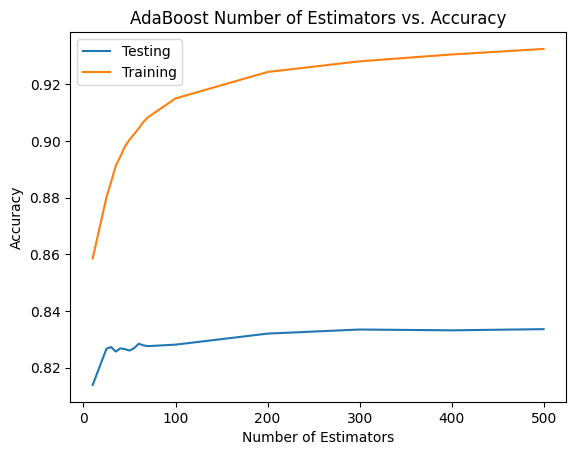

In [19]:
# Test with different n_estimators
num_estimators = [10, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100, 200, 300, 400, 500]
accuracies = np.zeros((len(num_estimators), 6))
for (i, num) in enumerate(num_estimators):
    print("Number of Estimators: " + str(num))
    
    base_estimator = DecisionTreeClassifier(criterion="gini", max_depth=1)
    clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=num, random_state=0)

    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

    print(f'ROC AUC Testing Accuracy: {accuracies[i,0]}')
    print(f'ROC AUC Training Accuracy: {accuracies[i,1]}')
    print(f'ROC AUC Testing Accuracy with Probabilities: {accuracies[i,2]}')
    print(f'ROC AUC Training Accuracy with Probabilities: {accuracies[i,3]}')
    print(f'Testing Accuracy: {accuracies[i,4]}')
    print(f'Training Accuracy: {accuracies[i,5]}')

plot_accuracies(num_estimators, accuracies[:,[2,3]], True, "AdaBoost Number of Estimators vs. Accuracy", "Number of Estimators", "Accuracy")

In [26]:
# Compare Gini vs. Entropy loss
num_trials = 100
accuracies = np.zeros((100, 6))
print("Gini: ")
for i in range(num_trials):
    base_estimator = DecisionTreeClassifier(criterion="gini", max_depth=1)
    clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=40)
    
    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

print(f'ROC AUC Testing Accuracy: {np.mean(accuracies[:,0])}')
print(f'ROC AUC Training Accuracy: {np.mean(accuracies[:,1])}')
print(f'ROC AUC Testing Accuracy with Probabilities: {np.mean(accuracies[:,2])}')
print(f'ROC AUC Training Accuracy with Probabilities: {np.mean(accuracies[:,3])}')
print(f'Testing Accuracy: {np.mean(accuracies[:,4])}')
print(f'Training Accuracy: {np.mean(accuracies[:,5])}')

num_trials = 100
accuracies = np.zeros((100, 6))
print("Entropy: ")
for i in range(num_trials):
    base_estimator = DecisionTreeClassifier(criterion="entropy", max_depth=1)
    clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=40)
    
    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

print(f'ROC AUC Testing Accuracy: {np.mean(accuracies[:,0])}')
print(f'ROC AUC Training Accuracy: {np.mean(accuracies[:,1])}')
print(f'ROC AUC Testing Accuracy with Probabilities: {np.mean(accuracies[:,2])}')
print(f'ROC AUC Training Accuracy with Probabilities: {np.mean(accuracies[:,3])}')
print(f'Testing Accuracy: {np.mean(accuracies[:,4])}')
print(f'Training Accuracy: {np.mean(accuracies[:,5])}')

# Entropy seems to slightly better (perhaps negligible)

Gini: 
ROC AUC Testing Accuracy: 0.714628371178858
ROC AUC Training Accuracy: 0.7244119042198546
ROC AUC Testing Accuracy with Probabilities: 0.8441070742397596
ROC AUC Training Accuracy with Probabilities: 0.8582480207746117
Testing Accuracy: 0.804976473514748
Training Accuracy: 0.8125584152238341
Entropy: 
ROC AUC Testing Accuracy: 0.7186180082043258
ROC AUC Training Accuracy: 0.7257269384060473
ROC AUC Testing Accuracy with Probabilities: 0.8448482064957108
ROC AUC Training Accuracy with Probabilities: 0.8581625069908974
Testing Accuracy: 0.8081582423280532
Training Accuracy: 0.8131199281935924


In [7]:
# Generate submission using test.csv

raw_test = numerize_csv_test('test.csv', expand_classes=True)
#X_test = combine_related_columns_test(raw_test)

base_estimator = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=30)
clf.fit(X_train, y_train)
y_test_prob_preds = clf.predict_proba(raw_test)
write_submission(y_test_prob_preds[:, 1])